[Mixed effects in machine learning – A flexible mixedML
framework to add random effects to supervised machine
learning regression](https://openreview.net/pdf?id=MKZyHtmfwH)


> We introduce the general mixed effects machine learning framework (mixedML), which includes random effects in supervised regression machine learning models, and present different estimation procedures.  
A segmentation of the problem allows to include random effects as an additional correction to the standard machine learning regression problem.
Thus, the framework can be **applied on top of the machine learning task, without the need to change the model or architecture**, which distinguishes mixedML from other models in this field.

Lexicon: 
- EM: Expectation-Maximization  
- RE-EM: Random Effect - Expectation-Maximization  
- MLE: Maximum Likelihood Estimation  
- REML: Restricted Maximum Likelihood Estimation  (???) 

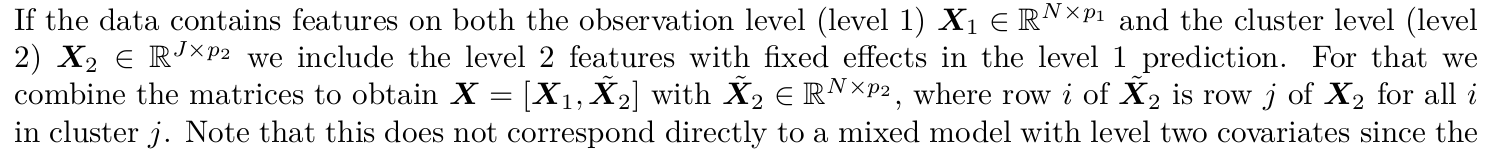

We do not need it here, since it's already done with column $x_8$.

But basically we need to do a `join` or `merge` of the observation table and cluster table using the cluster ID value, so we get the observable table with added (duplicated) cluster values.

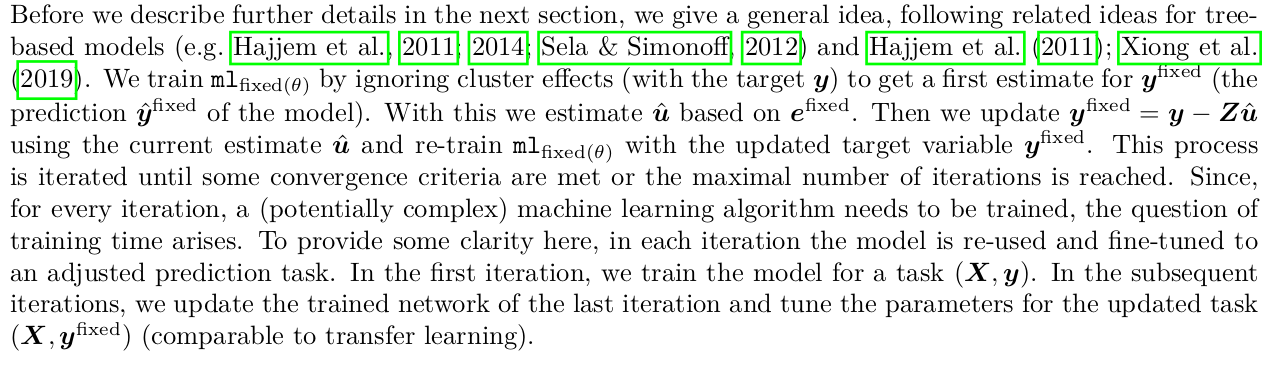

TOUDOU:  
[ ] implement with a classical ML model (no reshape needed)  
[ ] implement with a reccurent model (reshape needed)  
[ ] ¿implement with several targets columns?  

In [23]:
import numpy as np
import statsmodels.api as sm

    

def get_formula(df_data, x_mixed_labels,y_label):   
    x_dtypes = [df_data[x].dtype.name for x in x_mixed_labels]
    assert any(all(xdt in (float_type, 'categorie') for xdt in x_dtypes) for float_type in ('float32', 'float64'))
    x_strings = [f"C({x})" if xdt == 'categorie' for x, xdt in zip(x_mixed_labels, x_dtypes)]
    return y_label +' ~ ' + '+'.join(x_strings)
    

    
    

def solve_mixed_effect(df_data, x_mixed_labels, y_label, groups_labels):
    formula = get_formula(df_data, x_mixed_labels,y_label)
    smf.mixedlm(formula='', re_formula=formula, groups=groups_labels, data=df_data).fit()
    return mdf.random_effects
    
    


def iterate_mixedml(ml_fixed, df_data, x_fixed_labels, x_mixed_labels,
                    y_label, groups_labels):

    ####
    X = df_data[x_fixed_labels]
    y = df_data[[y_label]
    # we train ml_fixed by ignoring cluster effects (with the target y)
    ml_fixed.fit(X, y)
    # to get an estimate of y_fixed
    y_fixed = ml_fixed.run(X)

    ####
    # based on e_fixed
    y_rand = e_fixed = y - y_fixed
    # we estimate u
    u = solve_mixed_effect(e_fixed, x_mixed_labels, y_label, groups_labels)

    # then we upgrade y_fixed = y-Zu
    # we compute u using y_fixed then y_fixed using u ???

    # we re-train ml_fixed with the updated target variable y_fixed

    return ml_fixed, y_fixed, u


def test_convergence(u, u_new, eps):
    max_diff = (u - u_new).abs().max()
    print(f"\tmax diff of mixed residual: {max_diff:8.5g}")
    return max_diff < eps


def loop_mixedml(ml_fixed, df_data, x_fixed_labels, x_mixed_labels,
                    y_label, groups_labels, eps):
    u = np.zeros(Z.shape[0])
    istep = 0
    converged = False
    while not converged:
        print(f"mixedML step #{istep:02d}")
        ml_fixed, y, u_new = iterate_mixedml(ml_fixed, df_data, x_fixed_labels, x_mixed_labels,
                    y_label, groups_labels)
        converged = test_convergence(u, u_new, eps)
        u = u_new
        istep += 1

In [1]:
from sys import path
path.append('../reservoirs-synthetic_bph/')

from utils.data import get_dataframe, prepare_data



data=get_dataframe('../../data/synthetic_bph_1/01_test.csv')
data

,individus,temps,x1,x1_obs,x2,x2_obs,x3,x3_obs,x4,x4_obs,...,x7,x7_obs,x8,x2_x5,x4_x7,x6_x8,y_mixed,y_mixed_obs,y_fixed,y_fixed_obs
0,1,0,7.642962,6.541205,-4.901404,-4.930665,-2.762202,-2.708554,-0.524125,-0.684053,...,4.834070,3.941196,0,-18.623302,-2.533655,0.000000,-14.147090,-16.401119,-10.270811,-10.709328
1,1,1,9.115644,9.473100,-4.442349,-4.361045,-2.761245,-2.881917,-0.412815,-0.441288,...,2.628120,2.634557,0,-17.325424,-1.084928,0.000000,-13.233794,-13.504805,-9.577035,-9.098006
2,1,2,10.588327,9.902374,-4.173819,-4.263328,-2.758375,-2.779620,-0.312098,-0.283281,...,1.182562,0.864215,0,-16.696917,-0.369076,0.000000,-12.791824,-12.984600,-9.241134,-9.166685
3,1,3,12.061009,12.529263,-3.983294,-3.820831,-2.753592,-2.649039,-0.220966,-0.209213,...,0.478113,0.074657,0,-16.333284,-0.105647,0.000000,-12.532933,-12.428293,-9.046100,-7.888457
4,1,4,13.533692,13.084103,-3.835512,-3.638428,-2.746894,-2.827505,-0.138506,-0.011992,...,0.184193,-0.450209,0,-16.109461,-0.025512,0.000000,-12.371850,-13.117012,-8.925675,-9.075263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,500,21,53.020481,52.321472,-2.272128,-2.236098,-1.706892,-1.640332,1.684388,1.799199,...,0.228313,0.257998,1,-20.101305,0.384568,33.766777,14.255805,13.533262,3.614660,3.089746
12996,500,22,55.208542,55.218037,-2.240013,-2.426036,-1.688810,-1.665168,1.700566,1.514891,...,0.193649,-0.115100,1,-19.826836,0.329314,34.252884,14.365780,14.035857,3.974612,1.382215
12997,500,23,57.396603,56.736217,-2.209264,-2.319933,-1.669887,-1.666301,1.715204,1.755337,...,0.164140,0.788623,1,-19.561745,0.281534,34.742466,14.480370,15.106890,4.330982,4.661281
12998,500,24,59.584660,59.882187,-2.179771,-2.047545,-1.650123,-1.888849,1.728449,1.740999,...,0.139049,-0.247184,1,-19.305777,0.240339,35.235523,14.599297,12.746320,4.683908,3.172152


In [28]:
from sklearn.preprocessing import RobustScaler

X_LABELS = ['x2_x5', 'x4_x7', 'x6_x8']
Y_LABELS = ['y_mixed_obs']

robscal = RobustScaler()

X_train = robscal.fit_transform(data[X_LABELS])
y_train = robscal.fit_transform(data[Y_LABELS])

In [29]:
X_train

array([[-1.1883717 , -0.5572353 , -0.19408278],
       [-1.104581  , -0.2556902 , -0.19408278],
       [-1.0640047 , -0.10668924, -0.19408278],
       ...,
       [-1.2489573 ,  0.0287317 ,  0.58670294],
       [-1.232432  ,  0.02015729,  0.5977837 ],
       [-1.2164745 ,  0.01278365,  0.60894245]], dtype=float32)

In [30]:
y_train

array([[-0.98019475],
       [-0.8152226 ],
       [-0.78559214],
       ...,
       [ 0.8144802 ],
       [ 0.68002367],
       [ 0.79882574]], dtype=float32)

In [39]:
X_MIXED = X_LABELS  



Z_cov = robscal.fit_transform(data[X_MIXED])
Z_ones = np.ones((len(data), 1), dtype=Z_cov.dtype)

Z = np.concat([Z_ones, Z_cov], axis=1)

In [41]:
Z.shape

(13000, 4)

In [24]:
loop_mixedml(esn, x_train_3D_scaled, y_train_3D_scaled, Z, 0.1)

mixedML step #00


ValueError: operands could not be broadcast together with shapes (3,3) (500,26,1) 